<a href="https://colab.research.google.com/github/LaerteKimura/FIAP_trabalho_ML_Diagnostico/blob/main/FIAP_trabalho_ML_Diagnostico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas e módulos necessários

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

Importando o dataset a partir do mesmo diretório ( caso não esteja disponível é necessário fazer o upload)

In [16]:
data = pd.read_csv("diabetes_dataset.csv")

Verificando se os dados foram importados para a variável **data** , pedindo para ser exibido algumas linhas do inicio do arquivo

In [17]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Verificando a informação do dataset e os datatypes das colunas, buscando também por valores nulos

In [18]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Verificando se alguma coluna está nula para possível tratamento

In [19]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Para facilitar a identificação dos nomes das colunas, pedi pra listar

In [20]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Verificando informações e estatisticas das colunas do dataset

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Verificando a quantidade de linhas e colunas presentes no dataset

In [22]:
data.shape

(768, 9)

Verificando a distribuição das linhas pela variável Target

In [23]:
data.groupby("Outcome").describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

Plotando as distribuições para identificar valores "Outliners" - pode se verificar que foi encontrado ocorrências na Coluna "Insulin" , "Blood Pressure" , "BMI" ...

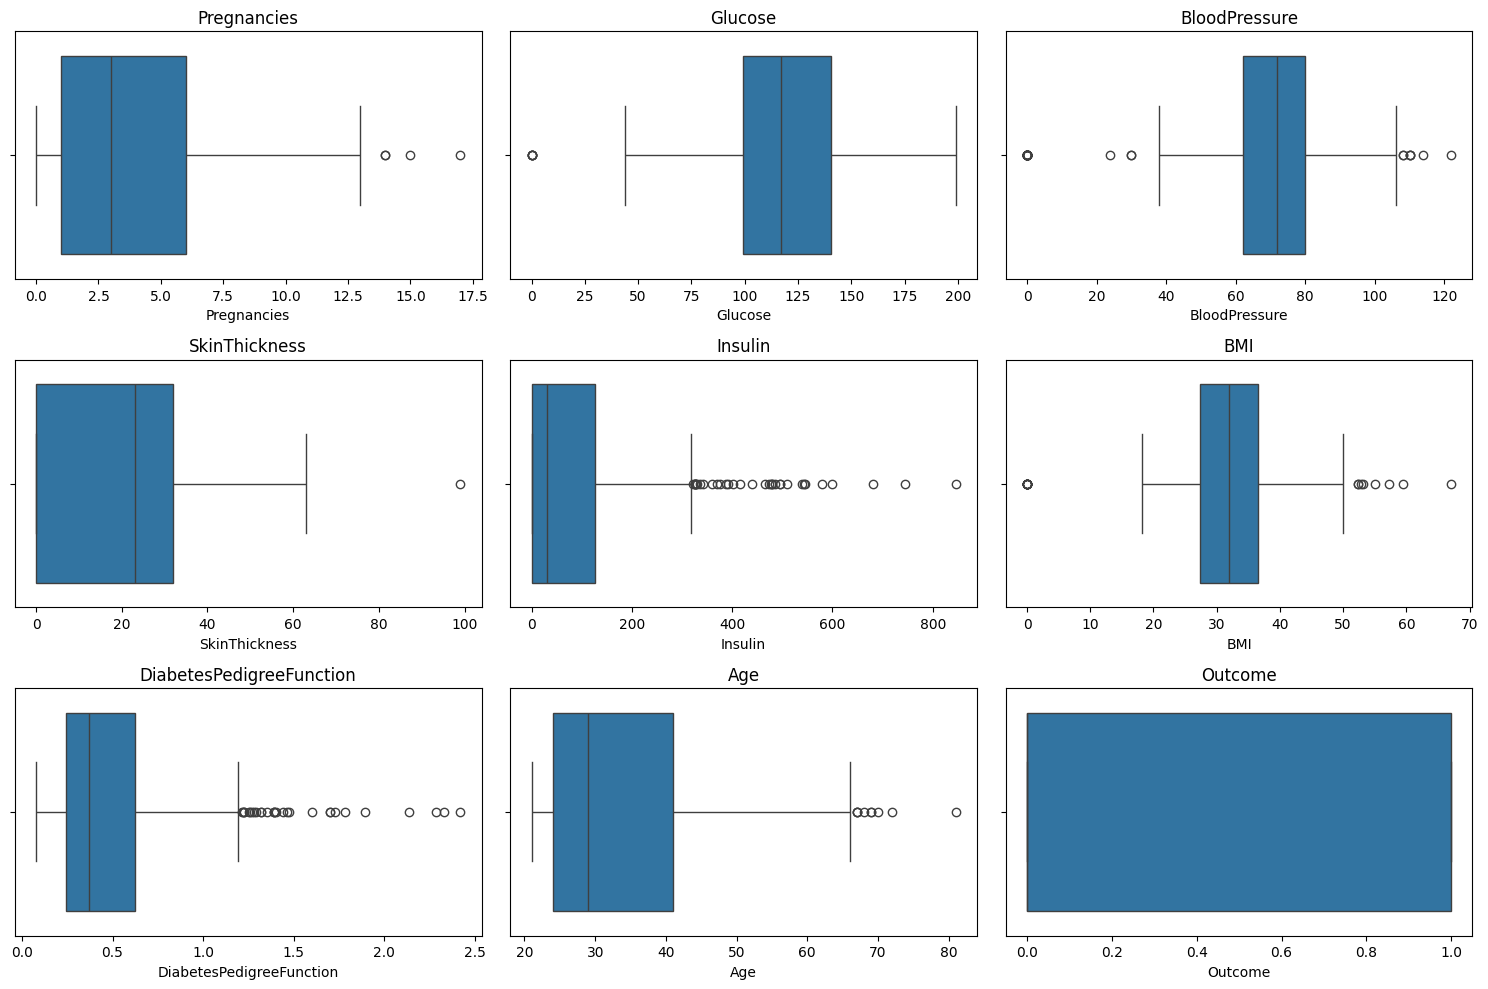

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Removendo os Outliners e criando um novo dataset = **datacleaned**

In [28]:
# Function to remove outliers
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_cleaned


data_cleaned = remove_outliers_iqr(data[numerical_cols])

print("Original shape:", data.shape)
print("Shape after removing outliers:", data_cleaned.shape)

Original shape: (768, 9)
Shape after removing outliers: (639, 9)


Verificamos novamente os gráficos para conferencia que os outliners foram removidos com sucesso

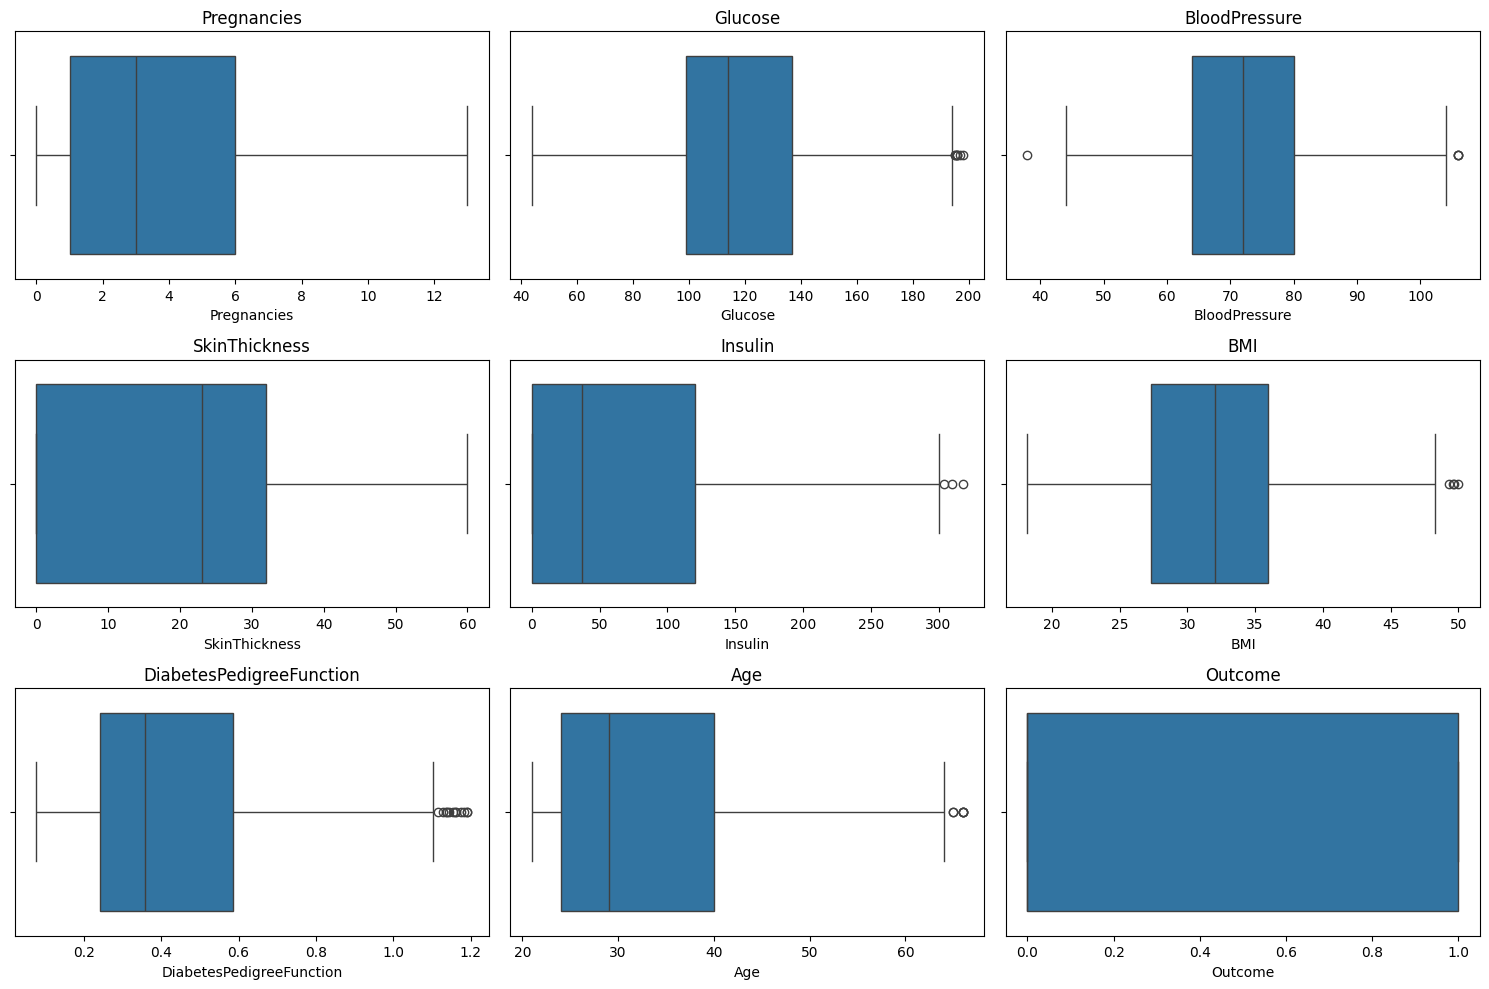

In [29]:
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Executando uma verificacao de correlacao entre as colunas

<Axes: >

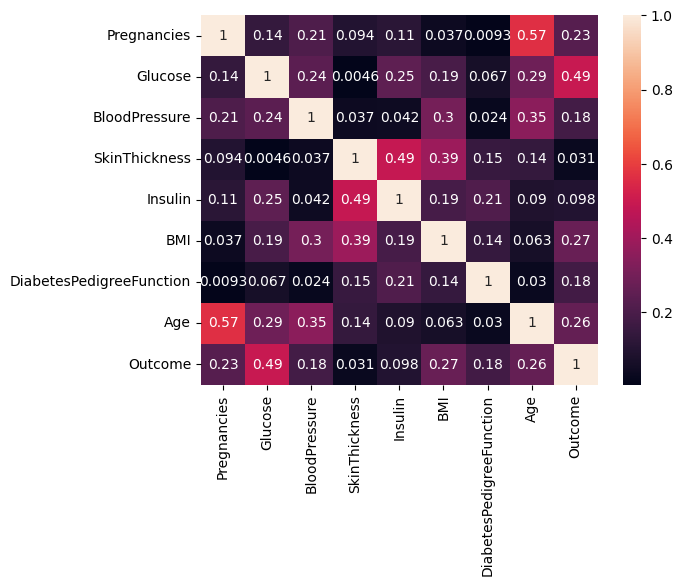

In [31]:
sns.heatmap(data_cleaned.corr().abs(),annot=True)

Iniciando a separacao da lista de variaveis de entrada e lista de variaveis target

In [33]:
x= data_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

In [34]:
y= data_cleaned['Outcome']

Verificando a separação das variaveis x e y

In [35]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
y

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


Executando o treinamento com 80% dos dados para aprendizagem e 20% para teste

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(x , y , test_size=0.20, stratify=y,random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier_model = KNeighborsClassifier(n_neighbors=3)

In [46]:
classifier_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
classifier_model.predict([[1, 148,	72,	35,	0	,33.6,	0.627,	50]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

explorando as metricas de classificacao

In [50]:
y_predito = classifier_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score


In [53]:
accuracy_score(y_true= Y_test , y_pred = y_predito)

0.703125